In [9]:
from sklearn.neighbors import KernelDensity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
#import geopandas as gpd
from mpl_toolkits.basemap import Basemap
#from shapely.geometry import Point, Polygon

#%matplotlib inline

In [10]:
dir_ = "../../data/database/output_ml/M1/NER_extractor/"
file = 'accident_tweets_lat_lon_3_months_bogota.tsv'

dataset = pd.read_csv(dir_+file, delimiter = "\t", quoting = 3)
df = dataset[(dataset['created_at'] >= '2018-10-01') & (dataset['created_at'] < '2018-11-01')]
geodata = df[['lat','lon']]
geodata.head(5)

,lat,lon
0,4.664445,-74.053855
1,4.664445,-74.053855
2,4.613574,-74.092709
3,4.613574,-74.092709
4,4.743242,-74.038825


In [12]:
latlon = np.vstack([geodata['lat'],
                    geodata['lon']]).T
latlon

array([[  4.6644446 , -74.053855  ],
       [  4.6644446 , -74.053855  ],
       [  4.61357357, -74.09270913],
       ...,
       [  4.6720161 , -74.1149971 ],
       [  4.6720161 , -74.1149971 ],
       [  4.6720161 , -74.1149971 ]])

In [13]:
kde = KernelDensity(bandwidth=0.0003, kernel='epanechnikov')
kde.fit(X = np.radians(latlon))

KernelDensity(bandwidth=0.0003, kernel='epanechnikov')

In [2]:
from sklearn.datasets import fetch_species_distributions

In [70]:
data = fetch_species_distributions()
data.x_left_lower_corner
data.grid_size
data.Nx

1212

In [76]:
# Grid de valores dentro del rango observado (2 dimensiones)
x = np.linspace(min(geodata.lon), max(geodata.lon), 400)
y = np.linspace(min(geodata.lat), max(geodata.lat), 400)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack((yy.flatten(), xx.flatten()))

log_densidad_pred = kde.score_samples(np.radians(grid))
densidad_pred = np.exp(log_densidad_pred)

zz = densidad_pred.reshape(xx.shape)
levels = np.linspace(0, zz.max(), 25)


In [26]:
zz.shape

(400, 400)

<ipython-input-86-3c802d97f236>:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map = Basemap(llcrnrlon=-74.253565,llcrnrlat=4.421138,urcrnrlon= -73.936334,urcrnrlat=4.874886,
<ipython-input-86-3c802d97f236>:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.readshapefile('maps/locashp/Loca', 'Loca')


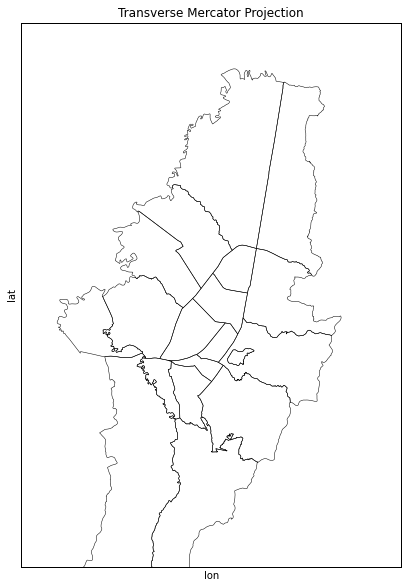

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

map = Basemap(llcrnrlon=-74.253565,llcrnrlat=4.421138,urcrnrlon= -73.936334,urcrnrlat=4.874886,
             resolution='i', projection='cyl', lat_0 = 4.4863006081, lon_0 = -74.2306435108)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='white',lake_color='aqua')
#map.drawcoastlines()

map.readshapefile('maps/locashp/Loca', 'Loca')

#map.readshapefile('maps/munishp/Muni', 'Muni')
#map.readshapefile('maps/calzadashp/Calzada', 'Calzada')
#map.readshapefile('maps/malla/Malla_Vial_Integral_Bogota_D_C', 'Malla_Vial_Integral_Bogota_D_C')
patches   = []


"""for info, shape in zip(map.Loca_info, map.Loca):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
 
ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))
"""

#ax.scatter(geodata.lon, geodata.lat, alpha=0.5)
ax.contour(
    xx, yy, zz, levels=levels,
    #alpha=0.9,
    cmap=plt.cm.Reds,    
)
#x = np.linspace(0, map.urcrnrx, zz.shape[1])
#y = np.linspace(0, map.urcrnry, zz.shape[0])

#xx, yy = np.meshgrid(x, y)

#ax.contourf(xx, yy, zz, levels)

ax.set_title('Función de densidad estimada')
ax.set_xlabel('lon')
ax.set_ylabel('lat');

x0, y0 = m(-180, -65)
x1, y1 = m(180, 85)
plt.title("Transverse Mercator Projection")
map.imshow(zz, origin='lower',  cmap=plt.cm.Reds)
plt.show()

In [80]:
map.Loca

[[(-74.1307544629999, 4.593353347000061),
  (-74.1291650249999, 4.59327354900006),
  (-74.12825843399992, 4.593273518000046),
  (-74.12759225199994, 4.593273494000073),
  (-74.12635175499992, 4.593251218000091),
  (-74.1250004929999, 4.593317851000052),
  (-74.1221429069999, 4.59356224600009),
  (-74.1209023959999, 4.593784475000064),
  (-74.11950681999991, 4.594117835000077),
  (-74.11797832699995, 4.594517874000076),
  (-74.11687072399991, 4.594806789000074),
  (-74.11567450699994, 4.59516238000009),
  (-74.11463335799994, 4.595384611000043),
  (-74.11343713799994, 4.595806885000059),
  (-74.11157633699992, 4.596607006000056),
  (-74.10909525399995, 4.597829421000085),
  (-74.10856757099992, 4.597944794000057),
  (-74.10821599099995, 4.598016700000073),
  (-74.10783710399994, 4.598088603000065),
  (-74.10707300599995, 4.598243989000082),
  (-74.10445608099991, 4.596198915000059),
  (-74.10402826599994, 4.595840775000056),
  (-74.10370606499993, 4.595454948000054),
  (-74.103669458999

In [78]:
for info, shape in zip(map.Loca_info, map.Loca):
    print(info)

{'LocNombre': 'ANTONIO NARIÑO', 'LocAAdmini': 'Acuerdo 117 de 2003', 'LocArea': 4879543.38643, 'LocCodigo': '15', 'SHAPE_Leng': 0.108973020106, 'SHAPE_Area': 0.000397341362785, 'RINGNUM': 1, 'SHAPENUM': 1}
{'LocNombre': 'TUNJUELITO', 'LocAAdmini': 'Acuerdo 117 de 2003', 'LocArea': 9910939.74357, 'LocCodigo': '06', 'SHAPE_Leng': 0.210541987668, 'SHAPE_Area': 0.00080703274926, 'RINGNUM': 1, 'SHAPENUM': 2}
{'LocNombre': 'RAFAEL URIBE URIBE', 'LocAAdmini': 'Acuerdo 117 de 2003', 'LocArea': 13834084.8065, 'LocCodigo': '18', 'SHAPE_Leng': 0.174512697896, 'SHAPE_Area': 0.00112647548612, 'RINGNUM': 1, 'SHAPENUM': 3}
{'LocNombre': 'CANDELARIA', 'LocAAdmini': 'Acuerdo 117 de 2003', 'LocArea': 2060242.92048, 'LocCodigo': '17', 'SHAPE_Leng': 0.0671578803281, 'SHAPE_Area': 0.000167767155959, 'RINGNUM': 1, 'SHAPENUM': 4}
{'LocNombre': 'BARRIOS UNIDOS', 'LocAAdmini': 'Acuerdo 8 de 1977', 'LocArea': 11903448.2049, 'LocCodigo': '12', 'SHAPE_Leng': 0.121180170982, 'SHAPE_Area': 0.000969405683082, 'RINGN